In [7]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector


operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import extraction_squares

In [8]:
# import the most corrolated variables from the time series
vars_selected = pd.read_csv('pre_processing/feature_selection/fs_corr_timeseries/corr_inst_max_30.csv')
vars_selected = vars_selected['Unnamed: 0'].values

In [21]:
stats = ['max', 'min', 'mean', 'std']
name_of_variable_levels = vars_selected
all_series = 'yes'

# shape all_data as the timeseries data
X_all_vars = {}

for var in name_of_variable_levels:
    var = var.rsplit("_", 1)[0]
    if var == 'sea_surface_temperature':
        continue
    for stat in stats:
        var_stat = f'{var}_{stat}'
        #if var_stat == f'instantaneous_10m_wind_gust_{stat}':
        #storm_data = []
        if all_series == 'yes':
            var_temp_non_eu = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
            # reverse the order of the columns
            var_temp_non_eu = var_temp_non_eu.iloc[:, ::-1]
            var_temp_eu = pd.read_csv(f'data/time_series_1h_EU/{var}/{var}_{stat}.csv')
            var_temp = pd.concat([var_temp_non_eu, var_temp_eu], axis=1)
        else:
            var_temp = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
        var_temp = var_temp.drop(columns=['Unnamed: 0', 'storm_index'])
        # select only the 12 first hours (represented by the 12 first columns)
        if all_series == 'no':
            var_temp = var_temp.iloc[:, :12]
        #var_temp_2 = var_temp.drop(columns=['storm_index'])
        var_temp_reshape = var_temp.to_numpy().reshape((var_temp.shape[0]*var_temp.shape[1]))
        X_all_vars[f'{var_stat}'] = var_temp_reshape

# Assuming all_vars is populated as a dictionary
df_X_all_vars = pd.DataFrame(X_all_vars)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(df_X_all_vars)

y_all = {}

var = 'instantaneous_10m_wind_gust'
stat = 'max'
var_stat = f'{var}_{stat}'
if all_series == 'yes':
    var_temp_non_eu = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
    # reverse the order of the columns
    var_temp_non_eu = var_temp_non_eu.iloc[:, ::-1]
    var_temp_eu = pd.read_csv(f'data/time_series_1h_EU/{var}/{var}_{stat}.csv')
    var_temp = pd.concat([var_temp_non_eu, var_temp_eu], axis=1)
else:
    var_temp = pd.read_csv(f'data/time_series_1h_EU/{var}/{var}_{stat}.csv')
var_temp = var_temp.drop(columns=['Unnamed: 0', 'storm_index', 'storm_name','start_date'])
# select only the 12 first hours (represented by the 12 first columns)
if all_series == 'no':
    var_temp = var_temp.iloc[:, :12]
#var_temp_2 = var_temp.drop(columns=['storm_index'])
var_temp_reshape = var_temp.to_numpy().reshape((var_temp.shape[0]*var_temp.shape[1]))
y_all[f'{var_stat}'] = var_temp_reshape

df_y = pd.DataFrame(y_all)

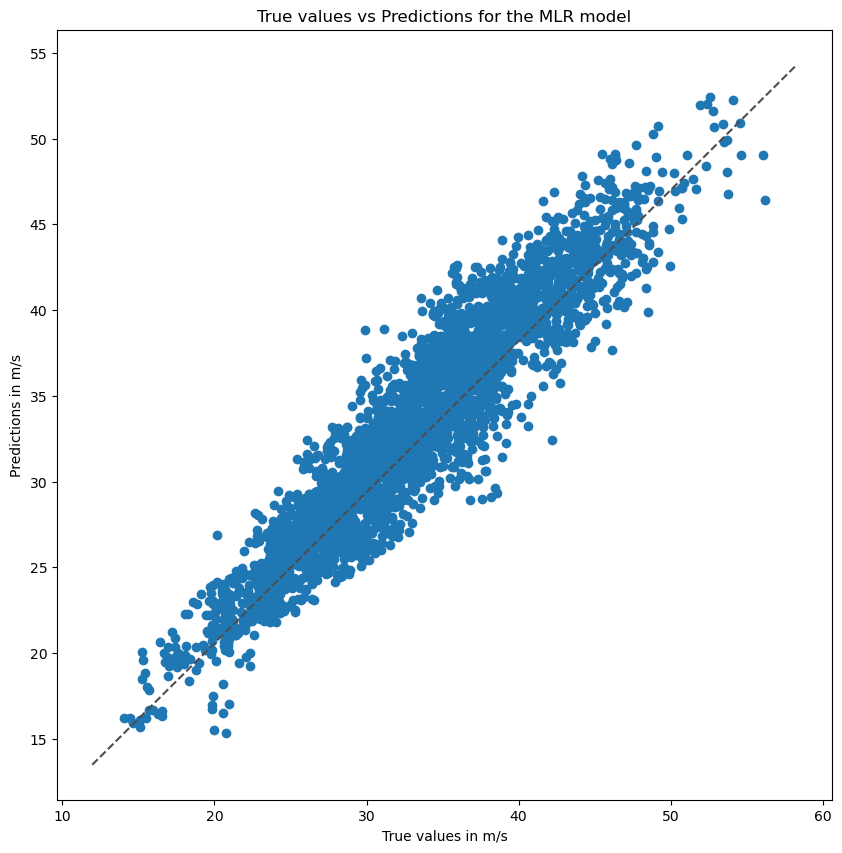

10m_u_component_of_wind_max: 2.526
10m_u_component_of_wind_min: -0.094
10m_u_component_of_wind_mean: -0.246
10m_u_component_of_wind_std: 0.556
mean_sea_level_pressure_max: -5.609
mean_sea_level_pressure_min: 2.261
mean_sea_level_pressure_mean: -6.366
mean_sea_level_pressure_std: 0.205
surface_pressure_max: 1.988
surface_pressure_min: -0.165
surface_pressure_mean: -1.669
surface_pressure_std: -0.157
geopotential_500_max: -1.152
geopotential_500_min: -0.556
geopotential_500_mean: 0.402
geopotential_500_std: -0.004
geopotential_1000_max: -0.556
geopotential_1000_min: 0.402
geopotential_1000_mean: -0.004
geopotential_1000_std: 9.164
mean_surface_latent_heat_flux_max: -57.678
mean_surface_latent_heat_flux_min: 776.107
mean_surface_latent_heat_flux_mean: -2221.632
mean_surface_latent_heat_flux_std: 2321.857
surface_latent_heat_flux_max: 57.707
surface_latent_heat_flux_min: -776.284
surface_latent_heat_flux_mean: 2220.535
surface_latent_heat_flux_std: -2321.170
10m_v_component_of_wind_max: 1.

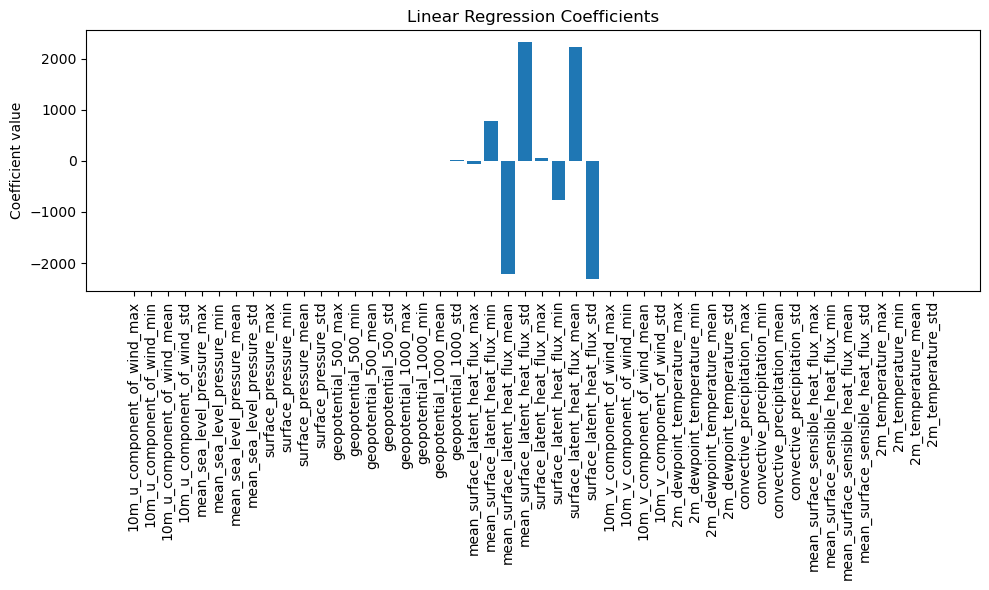

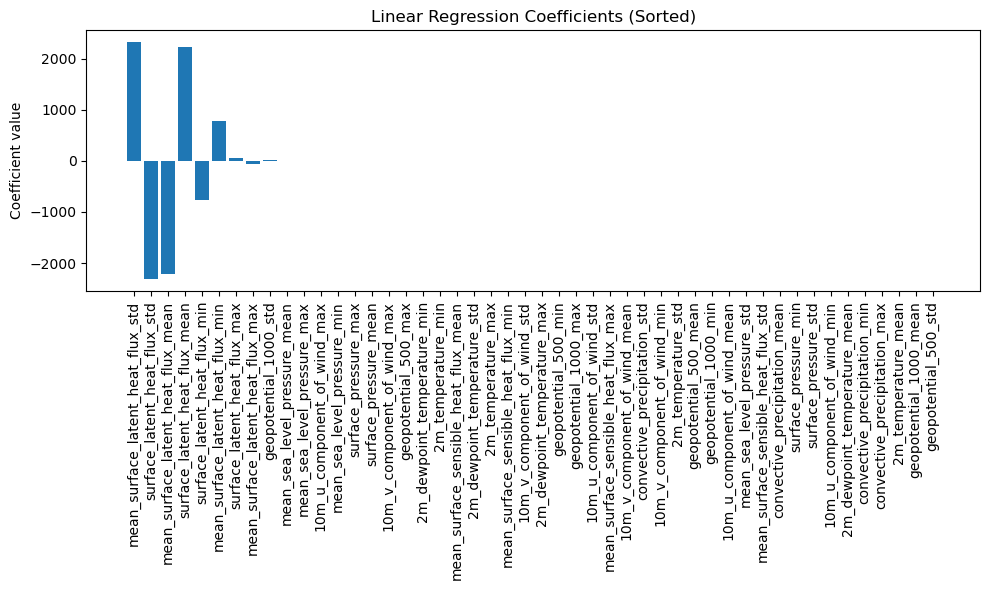

Features ranked by importance: ['mean_surface_latent_heat_flux_std', 'surface_latent_heat_flux_std', 'mean_surface_latent_heat_flux_mean', 'surface_latent_heat_flux_mean', 'surface_latent_heat_flux_min', 'mean_surface_latent_heat_flux_min', 'surface_latent_heat_flux_max', 'mean_surface_latent_heat_flux_max', 'geopotential_1000_std', 'mean_sea_level_pressure_mean', 'mean_sea_level_pressure_max', '10m_u_component_of_wind_max', 'mean_sea_level_pressure_min', 'surface_pressure_max', 'surface_pressure_mean', '10m_v_component_of_wind_max', 'geopotential_500_max', '2m_dewpoint_temperature_min', '2m_temperature_min', 'mean_surface_sensible_heat_flux_mean', '2m_dewpoint_temperature_std', '2m_temperature_max', 'mean_surface_sensible_heat_flux_min', '10m_v_component_of_wind_std', '2m_dewpoint_temperature_max', 'geopotential_500_min', 'geopotential_1000_max', '10m_u_component_of_wind_std', 'mean_surface_sensible_heat_flux_max', '10m_v_component_of_wind_mean', 'convective_precipitation_std', '10m_v

In [22]:
# fit the model
model = LinearRegression(n_jobs=-1)
model.fit(scaled_X, df_y.to_numpy().ravel())

# predictions
y_pred = model.predict(scaled_X)

# plot the predictions
plt.figure(figsize=(10, 10))
plt.plot(df_y, y_pred, 'o')
# plot the 45 degree line
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel('True values in m/s')
plt.ylabel('Predictions in m/s')
plt.title('True values vs Predictions for the MLR model')
plt.show()

# get the coefficients
coefficients = model.coef_
# Print feature names alongside coefficients
feature_names = df_X_all_vars.columns
for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef:.3f}")

plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, coefficients)

# You can also color-code bars by sign if you want:
# for bar, coef in zip(bars, coefs):
#     bar.set_color('g' if coef >= 0 else 'r')

plt.xticks(rotation=90)  # rotate feature names if there are many
plt.ylabel('Coefficient value')
plt.title('Linear Regression Coefficients')
plt.tight_layout()  # ensure the x-labels are fully visible
plt.show()

# Sort by absolute value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]  # descending order
sorted_coefs = coefficients[sorted_indices]
sorted_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_names, sorted_coefs)
plt.xticks(rotation=90)
plt.ylabel('Coefficient value')
plt.title('Linear Regression Coefficients (Sorted)')
plt.tight_layout()
plt.show()

coefs_abs = np.abs(coefficients)
ranked_features = [feature for _, feature in sorted(zip(coefs_abs, feature_names), reverse=True)]
print("Features ranked by importance:", ranked_features)


In [23]:
# Initialize the sequential feature selector
sfs = SequentialFeatureSelector(
                                model,  # Use the same model as before
                                n_features_to_select=5,  # Select 5 features
                                direction='forward',  # Forward selection
                                n_jobs=-1  # Use all available cores
                                )   

# Fit the selector
sfs.fit(scaled_X, df_y.to_numpy().ravel())

# Get the selected feature indices
selected_indices = sfs.get_support(indices=True)

# Get the names of the selected features
selected_features = df_X_all_vars.columns[selected_indices]
print("Selected features:", selected_features)

Selected features: Index(['10m_u_component_of_wind_max', 'surface_pressure_max',
       'surface_pressure_mean', 'mean_surface_latent_heat_flux_std',
       '10m_v_component_of_wind_max'],
      dtype='object')
